In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv("datasets/titanic.csv")
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


1. sibsp - Siblings and spouse count

2. parch - Parent and children count

missing values are found in the columns like age, fare, embark, cabin

embark - port

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


# Data cleaning

1. Check for duplicates and handle them

2. handle the missing values

3. check for invalid datatypes and handle them

In [108]:
df.duplicated()

# no duplicates present in the dataset

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [109]:
age_median = df['age'].median()

In [110]:
fare_median = df['fare'].median()

In [111]:
df['age'] = df['age'].fillna(age_median)

In [112]:
df['fare'] = df['fare'].fillna(fare_median)

In [113]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [114]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [115]:
df['embarked'].mode()[0]

'S'

In [116]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [118]:
df = df.dropna(axis=1)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


All the columns have valid data type

# Data Transformation (or) Feature Engineering

In [120]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


In [121]:
df = df.rename(columns={"sex": "gender", "embarked":"port"})
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


In [122]:
df['pclass'].unique()

array([1, 2, 3])

In [123]:
df['name'].str.split()

0                      [Allen,, Miss., Elisabeth, Walton]
1                     [Allison,, Master., Hudson, Trevor]
2                       [Allison,, Miss., Helen, Loraine]
3              [Allison,, Mr., Hudson, Joshua, Creighton]
4       [Allison,, Mrs., Hudson, J, C, (Bessie, Waldo,...
                              ...                        
1304                             [Zabour,, Miss., Hileni]
1305                            [Zabour,, Miss., Thamine]
1306                        [Zakarian,, Mr., Mapriededer]
1307                              [Zakarian,, Mr., Ortin]
1308                               [Zimmerman,, Mr., Leo]
Name: name, Length: 1309, dtype: object

In [124]:
df['name'].str.split(",", expand=True)

,0,1
0,Allen,Miss. Elisabeth Walton
1,Allison,Master. Hudson Trevor
2,Allison,Miss. Helen Loraine
3,Allison,Mr. Hudson Joshua Creighton
4,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Zabour,Miss. Hileni
1305,Zabour,Miss. Thamine
1306,Zakarian,Mr. Mapriededer
1307,Zakarian,Mr. Ortin


In [125]:
df[['lname', 'temp']] = df['name'].str.split(",", expand=True)
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin


In [126]:
df['temp'].str.split(".", expand=True,n=1)

,0,1
0,Miss,Elisabeth Walton
1,Master,Hudson Trevor
2,Miss,Helen Loraine
3,Mr,Hudson Joshua Creighton
4,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Miss,Hileni
1305,Miss,Thamine
1306,Mr,Mapriededer
1307,Mr,Ortin


In [127]:
df[['courtesy_title', 'fname']] = df['temp'].str.split(".", expand=True,n=1)
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [128]:
df['courtesy_title'] = df['courtesy_title'].str.strip()
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


# df['fname'] = df['fname'].str.strip()
# df['lname'] = df['lname'].str.strip()
# df

In [129]:
for col_names in ['fname', 'lname', 'courtesy_title']:
    df[col_names] = df[col_names].str.strip()

df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [130]:
df['gender'] = df['gender'].str.title()
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",Female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [131]:
df['age'] = df['age'].round(1)
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",Female,29.0,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",Male,0.9,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",Female,2.0,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",Female,28.0,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",Male,27.0,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [132]:
df['fam_cnt'] = df['sibsp'] + df['parch']
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname,fam_cnt
0,1,"Allen, Miss. Elisabeth Walton",Female,29.0,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton,0
1,1,"Allison, Master. Hudson Trevor",Male,0.9,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor,3
2,1,"Allison, Miss. Helen Loraine",Female,2.0,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine,3
3,1,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni,1
1305,3,"Zabour, Miss. Thamine",Female,28.0,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine,1
1306,3,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer,0
1307,3,"Zakarian, Mr. Ortin",Male,27.0,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin,0


In [133]:
df = df.sort_values(by='ticket', ascending=True)
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname,fam_cnt
67,1,"Cherry, Miss. Gladys",Female,30.0,0,0,110152,86.500,S,1,Cherry,Miss. Gladys,Miss,Gladys,0
245,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",Female,33.0,0,0,110152,86.500,S,1,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),the Countess,of (Lucy Noel Martha Dyer-Edwards),0
195,1,"Maioni, Miss. Roberta",Female,16.0,0,0,110152,86.500,S,1,Maioni,Miss. Roberta,Miss,Roberta,0
289,1,"Taussig, Miss. Ruth",Female,18.0,0,2,110413,79.650,S,1,Taussig,Miss. Ruth,Miss,Ruth,2
291,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",Female,39.0,1,1,110413,79.650,S,1,Taussig,Mrs. Emil (Tillie Mandelbaum),Mrs,Emil (Tillie Mandelbaum),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",Female,47.0,1,0,W.E.P. 5734,61.175,S,1,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),Mrs,Herbert Fuller (Carrie Constance Toogood),1
62,1,"Chaffee, Mr. Herbert Fuller",Male,46.0,1,0,W.E.P. 5734,61.175,S,0,Chaffee,Mr. Herbert Fuller,Mr,Herbert Fuller,1
433,2,"Harris, Mr. Walter",Male,30.0,0,0,W/C 14208,10.500,S,0,Harris,Mr. Walter,Mr,Walter,0
81,1,"Crosby, Capt. Edward Gifford",Male,70.0,1,1,WE/P 5735,71.000,S,0,Crosby,Capt. Edward Gifford,Capt,Edward Gifford,2


In [134]:
df['ticket'].value_counts()

ticket
CA. 2343            11
CA 2144              8
1601                 8
S.O.C. 14879         7
347082               7
                    ..
SOTON/O2 3101272     1
STON/O2. 3101283     1
STON/O2. 3101282     1
STON/O2. 3101271     1
112050               1
Name: count, Length: 929, dtype: int64

In [135]:
tik_df = df['ticket'].value_counts().reset_index()

In [136]:
df = pd.merge(df, tik_df, on='ticket', how="inner")
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname,fam_cnt,count
0,1,"Cherry, Miss. Gladys",Female,30.0,0,0,110152,86.500,S,1,Cherry,Miss. Gladys,Miss,Gladys,0,3
1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",Female,33.0,0,0,110152,86.500,S,1,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,"Maioni, Miss. Roberta",Female,16.0,0,0,110152,86.500,S,1,Maioni,Miss. Roberta,Miss,Roberta,0,3
3,1,"Taussig, Miss. Ruth",Female,18.0,0,2,110413,79.650,S,1,Taussig,Miss. Ruth,Miss,Ruth,2,3
4,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",Female,39.0,1,1,110413,79.650,S,1,Taussig,Mrs. Emil (Tillie Mandelbaum),Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",Female,47.0,1,0,W.E.P. 5734,61.175,S,1,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,"Chaffee, Mr. Herbert Fuller",Male,46.0,1,0,W.E.P. 5734,61.175,S,0,Chaffee,Mr. Herbert Fuller,Mr,Herbert Fuller,1,2
1306,2,"Harris, Mr. Walter",Male,30.0,0,0,W/C 14208,10.500,S,0,Harris,Mr. Walter,Mr,Walter,0,1
1307,1,"Crosby, Capt. Edward Gifford",Male,70.0,1,1,WE/P 5735,71.000,S,0,Crosby,Capt. Edward Gifford,Capt,Edward Gifford,2,2


In [137]:
df = df.rename(columns={'count': 'psg_cnt'})
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname,fam_cnt,psg_cnt
0,1,"Cherry, Miss. Gladys",Female,30.0,0,0,110152,86.500,S,1,Cherry,Miss. Gladys,Miss,Gladys,0,3
1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",Female,33.0,0,0,110152,86.500,S,1,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,"Maioni, Miss. Roberta",Female,16.0,0,0,110152,86.500,S,1,Maioni,Miss. Roberta,Miss,Roberta,0,3
3,1,"Taussig, Miss. Ruth",Female,18.0,0,2,110413,79.650,S,1,Taussig,Miss. Ruth,Miss,Ruth,2,3
4,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",Female,39.0,1,1,110413,79.650,S,1,Taussig,Mrs. Emil (Tillie Mandelbaum),Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",Female,47.0,1,0,W.E.P. 5734,61.175,S,1,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,"Chaffee, Mr. Herbert Fuller",Male,46.0,1,0,W.E.P. 5734,61.175,S,0,Chaffee,Mr. Herbert Fuller,Mr,Herbert Fuller,1,2
1306,2,"Harris, Mr. Walter",Male,30.0,0,0,W/C 14208,10.500,S,0,Harris,Mr. Walter,Mr,Walter,0,1
1307,1,"Crosby, Capt. Edward Gifford",Male,70.0,1,1,WE/P 5735,71.000,S,0,Crosby,Capt. Edward Gifford,Capt,Edward Gifford,2,2


In [138]:
df['fare'] = (df['fare']/df['psg_cnt']).round(1)
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname,fam_cnt,psg_cnt
0,1,"Cherry, Miss. Gladys",Female,30.0,0,0,110152,28.8,S,1,Cherry,Miss. Gladys,Miss,Gladys,0,3
1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",Female,33.0,0,0,110152,28.8,S,1,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,"Maioni, Miss. Roberta",Female,16.0,0,0,110152,28.8,S,1,Maioni,Miss. Roberta,Miss,Roberta,0,3
3,1,"Taussig, Miss. Ruth",Female,18.0,0,2,110413,26.6,S,1,Taussig,Miss. Ruth,Miss,Ruth,2,3
4,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",Female,39.0,1,1,110413,26.6,S,1,Taussig,Mrs. Emil (Tillie Mandelbaum),Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",Female,47.0,1,0,W.E.P. 5734,30.6,S,1,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,"Chaffee, Mr. Herbert Fuller",Male,46.0,1,0,W.E.P. 5734,30.6,S,0,Chaffee,Mr. Herbert Fuller,Mr,Herbert Fuller,1,2
1306,2,"Harris, Mr. Walter",Male,30.0,0,0,W/C 14208,10.5,S,0,Harris,Mr. Walter,Mr,Walter,0,1
1307,1,"Crosby, Capt. Edward Gifford",Male,70.0,1,1,WE/P 5735,35.5,S,0,Crosby,Capt. Edward Gifford,Capt,Edward Gifford,2,2


In [139]:
df['port'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [140]:
df['port'] = df['port'].replace({"S": "Southampton", "C": "Cherbourg", "Q": "Queens"})
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname,fam_cnt,psg_cnt
0,1,"Cherry, Miss. Gladys",Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss. Gladys,Miss,Gladys,0,3
1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,"Maioni, Miss. Roberta",Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss. Roberta,Miss,Roberta,0,3
3,1,"Taussig, Miss. Ruth",Female,18.0,0,2,110413,26.6,Southampton,1,Taussig,Miss. Ruth,Miss,Ruth,2,3
4,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",Female,39.0,1,1,110413,26.6,Southampton,1,Taussig,Mrs. Emil (Tillie Mandelbaum),Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,"Chaffee, Mr. Herbert Fuller",Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Chaffee,Mr. Herbert Fuller,Mr,Herbert Fuller,1,2
1306,2,"Harris, Mr. Walter",Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr. Walter,Mr,Walter,0,1
1307,1,"Crosby, Capt. Edward Gifford",Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt. Edward Gifford,Capt,Edward Gifford,2,2


In [141]:
df['name'] = df['fname'] + ' ' + df['lname']
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,lname,temp,courtesy_title,fname,fam_cnt,psg_cnt
0,1,Gladys Cherry,Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss. Gladys,Miss,Gladys,0,3
1,1,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,Roberta Maioni,Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss. Roberta,Miss,Roberta,0,3
3,1,Ruth Taussig,Female,18.0,0,2,110413,26.6,Southampton,1,Taussig,Miss. Ruth,Miss,Ruth,2,3
4,1,Emil (Tillie Mandelbaum) Taussig,Female,39.0,1,1,110413,26.6,Southampton,1,Taussig,Mrs. Emil (Tillie Mandelbaum),Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Herbert Fuller (Carrie Constance Toogood) Chaffee,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Chaffee,Mrs. Herbert Fuller (Carrie Constance Toogood),Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,Herbert Fuller Chaffee,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Chaffee,Mr. Herbert Fuller,Mr,Herbert Fuller,1,2
1306,2,Walter Harris,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr. Walter,Mr,Walter,0,1
1307,1,Edward Gifford Crosby,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt. Edward Gifford,Capt,Edward Gifford,2,2


In [142]:
df = df.drop(columns=['lname', 'temp', 'fname'])
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,courtesy_title,fam_cnt,psg_cnt
0,1,Gladys Cherry,Female,30.0,0,0,110152,28.8,Southampton,1,Miss,0,3
1,1,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,0,0,110152,28.8,Southampton,1,the Countess,0,3
2,1,Roberta Maioni,Female,16.0,0,0,110152,28.8,Southampton,1,Miss,0,3
3,1,Ruth Taussig,Female,18.0,0,2,110413,26.6,Southampton,1,Miss,2,3
4,1,Emil (Tillie Mandelbaum) Taussig,Female,39.0,1,1,110413,26.6,Southampton,1,Mrs,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Herbert Fuller (Carrie Constance Toogood) Chaffee,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Mrs,1,2
1305,1,Herbert Fuller Chaffee,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Mr,1,2
1306,2,Walter Harris,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Mr,0,1
1307,1,Edward Gifford Crosby,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Capt,2,2


In [143]:
pd.cut(df['age'], bins=[0, 2, 15, 30, 59, 100], labels=["Infant", "Child", "Teen", "Adult", "Senior"])
# (0-2) --> 2 is inclusive and 0 is exclusive
# (2-15) --> 2 is exclusive and 15 is inclusive

0         Teen
1        Adult
2         Teen
3         Teen
4        Adult
         ...  
1304     Adult
1305     Adult
1306      Teen
1307    Senior
1308     Adult
Name: age, Length: 1309, dtype: category
Categories (5, object): ['Infant' < 'Child' < 'Teen' < 'Adult' < 'Senior']

In [144]:
df['age_category'] = pd.cut(df['age'], bins=[0, 2, 15, 30, 59, 100], labels=["Infant", "Child", "Teen", "Adult", "Senior"])
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,courtesy_title,fam_cnt,psg_cnt,age_category
0,1,Gladys Cherry,Female,30.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen
1,1,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,0,0,110152,28.8,Southampton,1,the Countess,0,3,Adult
2,1,Roberta Maioni,Female,16.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen
3,1,Ruth Taussig,Female,18.0,0,2,110413,26.6,Southampton,1,Miss,2,3,Teen
4,1,Emil (Tillie Mandelbaum) Taussig,Female,39.0,1,1,110413,26.6,Southampton,1,Mrs,2,3,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Herbert Fuller (Carrie Constance Toogood) Chaffee,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Mrs,1,2,Adult
1305,1,Herbert Fuller Chaffee,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Mr,1,2,Adult
1306,2,Walter Harris,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Mr,0,1,Teen
1307,1,Edward Gifford Crosby,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Capt,2,2,Senior


In [145]:
df['courtesy_title'].unique()

array(['Miss', 'the Countess', 'Mrs', 'Mr', 'Dr', 'Major', 'Master',
       'Col', 'Lady', 'Jonkheer', 'Rev', 'Ms', 'Mlle', 'Mme', 'Sir',
       'Don', 'Dona', 'Capt'], dtype=object)

In [146]:
def social_status(row):
    if row['courtesy_title'] in ['Miss', 'Mrs', 'Mr', 'Master', 'Ms', 'Mlle']:
        return 'Common'
    elif row['courtesy_title'] in ['Don', 'Dona', 'the Countess', 'Sir', 'Lady']:
        return 'Royal'
    if row['courtesy_title'] in ['Capt', 'Major', 'Col']:
        return 'Military'
    else:
        return 'Other Profession'

In [147]:
df['social_status'] = df.apply(social_status, axis=1)
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,courtesy_title,fam_cnt,psg_cnt,age_category,social_status
0,1,Gladys Cherry,Female,30.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen,Common
1,1,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,0,0,110152,28.8,Southampton,1,the Countess,0,3,Adult,Royal
2,1,Roberta Maioni,Female,16.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen,Common
3,1,Ruth Taussig,Female,18.0,0,2,110413,26.6,Southampton,1,Miss,2,3,Teen,Common
4,1,Emil (Tillie Mandelbaum) Taussig,Female,39.0,1,1,110413,26.6,Southampton,1,Mrs,2,3,Adult,Common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Herbert Fuller (Carrie Constance Toogood) Chaffee,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Mrs,1,2,Adult,Common
1305,1,Herbert Fuller Chaffee,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Mr,1,2,Adult,Common
1306,2,Walter Harris,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Mr,0,1,Teen,Common
1307,1,Edward Gifford Crosby,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Capt,2,2,Senior,Military


In [148]:
df.loc[df['fam_cnt'] == 0]

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,courtesy_title,fam_cnt,psg_cnt,age_category,social_status
0,1,Gladys Cherry,Female,30.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen,Common
1,1,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,0,0,110152,28.8,Southampton,1,the Countess,0,3,Adult,Royal
2,1,Roberta Maioni,Female,16.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen,Common
6,1,Walter Chamberlain Porter,Male,47.0,0,0,110465,26.0,Southampton,0,Mr,0,2,Adult,Common
7,1,George Quincy Clifford,Male,28.0,0,0,110465,26.0,Southampton,0,Mr,0,2,Teen,Common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2,Percy Thomas Oxenham,Male,22.0,0,0,W./C. 14260,10.5,Southampton,1,Mr,0,1,Teen,Common
1292,2,Reginald Charles Coleridge,Male,29.0,0,0,W./C. 14263,10.5,Southampton,0,Mr,0,1,Teen,Common
1293,2,(Selena Rogers) Cook,Female,22.0,0,0,W./C. 14266,10.5,Southampton,1,Mrs,0,1,Teen,Common
1303,3,Alice Phoebe Harknett,Female,28.0,0,0,W./C. 6609,7.6,Southampton,0,Miss,0,1,Teen,Common


In [149]:
tick = df.loc[(df['fam_cnt']+1 != df['psg_cnt']), 'ticket'].unique()

In [150]:
def comp_type(row):
    if row['psg_cnt'] == 1:
        return "Solo"
    else:
        if (row['fam_cnt'] + 1 == row['psg_cnt']) or (row['fam_cnt'] >= row['psg_cnt']):
            return 'Family'
        elif row['ticket'] in tick:
            return 'Family + Friends'
        else:
            return 'Friends'

# finding solo, friends and family + friends

df['companion_type'] = df.apply(comp_type, axis=1)
df

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,courtesy_title,fam_cnt,psg_cnt,age_category,social_status,companion_type
0,1,Gladys Cherry,Female,30.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen,Common,Family + Friends
1,1,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,0,0,110152,28.8,Southampton,1,the Countess,0,3,Adult,Royal,Family + Friends
2,1,Roberta Maioni,Female,16.0,0,0,110152,28.8,Southampton,1,Miss,0,3,Teen,Common,Family + Friends
3,1,Ruth Taussig,Female,18.0,0,2,110413,26.6,Southampton,1,Miss,2,3,Teen,Common,Family
4,1,Emil (Tillie Mandelbaum) Taussig,Female,39.0,1,1,110413,26.6,Southampton,1,Mrs,2,3,Adult,Common,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Herbert Fuller (Carrie Constance Toogood) Chaffee,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Mrs,1,2,Adult,Common,Family
1305,1,Herbert Fuller Chaffee,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Mr,1,2,Adult,Common,Family
1306,2,Walter Harris,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Mr,0,1,Teen,Common,Solo
1307,1,Edward Gifford Crosby,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Capt,2,2,Senior,Military,Family


In [151]:
df.loc[df['companion_type'] == 'Solo', ['ticket', 'gender', 'sibsp', 'parch', 'fam_cnt', 'psg_cnt']]

,ticket,gender,sibsp,parch,fam_cnt,psg_cnt
8,110469,Male,0,0,0,1
9,110489,Male,0,0,0,1
10,110564,Male,0,0,0,1
13,111163,Male,0,0,0,1
14,111240,Male,0,0,0,1
...,...,...,...,...,...,...
1291,W./C. 14260,Male,0,0,0,1
1292,W./C. 14263,Male,0,0,0,1
1293,W./C. 14266,Female,0,0,0,1
1303,W./C. 6609,Female,0,0,0,1


In [152]:
df.loc[df['companion_type'] == 'Friends', ['ticket', 'gender', 'sibsp', 'parch', 'fam_cnt', 'psg_cnt']]

,ticket,gender,sibsp,parch,fam_cnt,psg_cnt


In [153]:
df.loc[(df['companion_type'] == 'Friends') & (df['fam_cnt'] > 0), ['ticket', 'gender', 'sibsp', 'parch', 'fam_cnt', 'psg_cnt']]

,ticket,gender,sibsp,parch,fam_cnt,psg_cnt


In [154]:
df.loc[df['companion_type'] == 'Family', ['ticket', 'gender', 'sibsp', 'parch', 'fam_cnt', 'psg_cnt']]

,ticket,gender,sibsp,parch,fam_cnt,psg_cnt
3,110413,Female,0,2,2,3
4,110413,Female,1,1,2,3
5,110413,Male,1,1,2,3
11,110813,Male,1,0,1,2
12,110813,Female,1,0,1,2
...,...,...,...,...,...,...
1302,W./C. 6608,Male,2,2,4,5
1304,W.E.P. 5734,Female,1,0,1,2
1305,W.E.P. 5734,Male,1,0,1,2
1307,WE/P 5735,Male,1,1,2,2


In [155]:
df.loc[(df['companion_type'] == 'Family') & (df['fam_cnt'] + 1 != df['psg_cnt']), ['ticket', 'gender', 'sibsp', 'parch', 'fam_cnt', 'psg_cnt']]

,ticket,gender,sibsp,parch,fam_cnt,psg_cnt
103,11751,Female,1,1,2,2
104,11751,Male,1,1,2,2
114,11769,Female,2,0,2,2
115,11769,Female,2,0,2,2
147,13567,Male,1,1,2,2
148,13567,Female,1,1,2,2
274,237789,Female,0,2,2,2
275,237789,Female,1,1,2,2
296,243847,Female,2,1,3,2
338,250649,Female,0,2,2,2


In [156]:
df.loc[df['ticket'] == "113781"]

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,courtesy_title,fam_cnt,psg_cnt,age_category,social_status,companion_type
71,1,Hudson Trevor Allison,Male,0.9,1,2,113781,25.3,Southampton,1,Master,3,6,Infant,Common,Family + Friends
72,1,Helen Loraine Allison,Female,2.0,1,2,113781,25.3,Southampton,0,Miss,3,6,Infant,Common,Family + Friends
73,1,Hudson Joshua Creighton Allison,Male,30.0,1,2,113781,25.3,Southampton,0,Mr,3,6,Teen,Common,Family + Friends
74,1,Alice Cleaver,Female,22.0,0,0,113781,25.3,Southampton,1,Miss,0,6,Teen,Common,Family + Friends
75,1,Hudson J C (Bessie Waldo Daniels) Allison,Female,25.0,1,2,113781,25.3,Southampton,0,Mrs,3,6,Teen,Common,Family + Friends
76,1,Sarah Daniels,Female,33.0,0,0,113781,25.3,Southampton,1,Miss,0,6,Adult,Common,Family + Friends


In [157]:
df.loc[df['ticket'] == "S.O.C. 14879"]

,pclass,name,gender,age,sibsp,parch,ticket,fare,port,survived,courtesy_title,fam_cnt,psg_cnt,age_category,social_status,companion_type
1203,2,Leonard Mark Hickman,Male,24.0,2,0,S.O.C. 14879,10.5,Southampton,0,Mr,2,7,Teen,Common,Family + Friends
1204,2,Percy William Deacon,Male,17.0,0,0,S.O.C. 14879,10.5,Southampton,0,Mr,0,7,Teen,Common,Family + Friends
1205,2,Stanley George Hickman,Male,21.0,2,0,S.O.C. 14879,10.5,Southampton,0,Mr,2,7,Teen,Common,Family + Friends
1206,2,Charles Henry Davies,Male,18.0,0,0,S.O.C. 14879,10.5,Southampton,0,Mr,0,7,Teen,Common,Family + Friends
1207,2,Ambrose Jr Hood,Male,21.0,0,0,S.O.C. 14879,10.5,Southampton,0,Mr,0,7,Teen,Common,Family + Friends
1208,2,William Dibden,Male,18.0,0,0,S.O.C. 14879,10.5,Southampton,0,Mr,0,7,Teen,Common,Family + Friends
1209,2,Lewis Hickman,Male,32.0,2,0,S.O.C. 14879,10.5,Southampton,0,Mr,2,7,Adult,Common,Family + Friends


# rearrange column orders

In [158]:
df.columns

Index(['pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'port', 'survived', 'courtesy_title', 'fam_cnt', 'psg_cnt',
       'age_category', 'social_status', 'companion_type'],
      dtype='object')

In [159]:
l = ['ticket', 'courtesy_title', 'name', 'gender', 'age', 'age_category', 'social_status', 'fam_cnt', 
     'companion_type', 'psg_cnt', 'pclass', 'fare', 'port', 'survived']

In [160]:
df = df[l]
df

,ticket,courtesy_title,name,gender,age,age_category,social_status,fam_cnt,companion_type,psg_cnt,pclass,fare,port,survived
0,110152,Miss,Gladys Cherry,Female,30.0,Teen,Common,0,Family + Friends,3,1,28.8,Southampton,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,Adult,Royal,0,Family + Friends,3,1,28.8,Southampton,1
2,110152,Miss,Roberta Maioni,Female,16.0,Teen,Common,0,Family + Friends,3,1,28.8,Southampton,1
3,110413,Miss,Ruth Taussig,Female,18.0,Teen,Common,2,Family,3,1,26.6,Southampton,1
4,110413,Mrs,Emil (Tillie Mandelbaum) Taussig,Female,39.0,Adult,Common,2,Family,3,1,26.6,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood) Chaffee,Female,47.0,Adult,Common,1,Family,2,1,30.6,Southampton,1
1305,W.E.P. 5734,Mr,Herbert Fuller Chaffee,Male,46.0,Adult,Common,1,Family,2,1,30.6,Southampton,0
1306,W/C 14208,Mr,Walter Harris,Male,30.0,Teen,Common,0,Solo,1,2,10.5,Southampton,0
1307,WE/P 5735,Capt,Edward Gifford Crosby,Male,70.0,Senior,Military,2,Family,2,1,35.5,Southampton,0


In [161]:
df.describe()

,age,fam_cnt,psg_cnt,pclass,fare,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503209,0.883881,2.101604,2.294882,14.757601,0.381971
std,12.905189,1.583639,1.779832,0.837836,13.550806,0.486055
min,0.200000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,0.000000,1.000000,2.000000,7.600000,0.000000
50%,28.000000,0.000000,1.000000,3.000000,8.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,15.000000,1.000000
max,80.000000,10.000000,11.000000,3.000000,128.100000,1.000000


In [162]:
df[['age', 'fare', 'pclass', 'survived']].describe()

,age,fare,pclass,survived
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503209,14.757601,2.294882,0.381971
std,12.905189,13.550806,0.837836,0.486055
min,0.200000,0.000000,1.000000,0.000000
25%,22.000000,7.600000,2.000000,0.000000
50%,28.000000,8.000000,3.000000,0.000000
75%,35.000000,15.000000,3.000000,1.000000
max,80.000000,128.100000,3.000000,1.000000


In [163]:
df.loc[df['fare'] == 0]

,ticket,courtesy_title,name,gender,age,age_category,social_status,fam_cnt,companion_type,psg_cnt,pclass,fare,port,survived
22,112050,Mr,Thomas Jr Andrews,Male,39.0,Adult,Common,0,Solo,1,1,0.0,Southampton,0
23,112051,Mr,Roderick Robert Crispin Chisholm,Male,28.0,Teen,Common,0,Solo,1,1,0.0,Southampton,0
24,112052,Mr,William Henry Marsh Parr,Male,28.0,Teen,Common,0,Solo,1,1,0.0,Southampton,0
26,112058,Mr,Joseph Bruce Ismay,Male,49.0,Adult,Common,0,Family + Friends,2,1,0.0,Southampton,1
27,112058,Mr,Richard Fry,Male,28.0,Teen,Common,0,Family + Friends,2,1,0.0,Southampton,0
28,112059,Mr,William Harrison,Male,40.0,Adult,Common,0,Solo,1,1,0.0,Southampton,0
206,19972,Jonkheer,John George Reuchlin,Male,38.0,Adult,Other Profession,0,Solo,1,1,0.0,Southampton,0
278,239853,Mr,"Francis ""Frank"" Parkes",Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0
279,239853,Mr,Alfred Fleming Cunningham,Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0
280,239853,Mr,William Campbell,Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0


In [164]:
df.loc[df['fare'] == 0].shape

(17, 14)

In [165]:
new_df = df.loc[df['fare'] == 0]
new_df

,ticket,courtesy_title,name,gender,age,age_category,social_status,fam_cnt,companion_type,psg_cnt,pclass,fare,port,survived
22,112050,Mr,Thomas Jr Andrews,Male,39.0,Adult,Common,0,Solo,1,1,0.0,Southampton,0
23,112051,Mr,Roderick Robert Crispin Chisholm,Male,28.0,Teen,Common,0,Solo,1,1,0.0,Southampton,0
24,112052,Mr,William Henry Marsh Parr,Male,28.0,Teen,Common,0,Solo,1,1,0.0,Southampton,0
26,112058,Mr,Joseph Bruce Ismay,Male,49.0,Adult,Common,0,Family + Friends,2,1,0.0,Southampton,1
27,112058,Mr,Richard Fry,Male,28.0,Teen,Common,0,Family + Friends,2,1,0.0,Southampton,0
28,112059,Mr,William Harrison,Male,40.0,Adult,Common,0,Solo,1,1,0.0,Southampton,0
206,19972,Jonkheer,John George Reuchlin,Male,38.0,Adult,Other Profession,0,Solo,1,1,0.0,Southampton,0
278,239853,Mr,"Francis ""Frank"" Parkes",Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0
279,239853,Mr,Alfred Fleming Cunningham,Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0
280,239853,Mr,William Campbell,Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0


In [166]:
new_df.index

Index([  22,   23,   24,   26,   27,   28,  206,  278,  279,  280,  281,  282,
        283, 1089, 1090, 1091, 1092],
      dtype='int64')

In [167]:
df = df.drop(index=new_df.index)
df = df.reset_index(drop=True)
df

,ticket,courtesy_title,name,gender,age,age_category,social_status,fam_cnt,companion_type,psg_cnt,pclass,fare,port,survived
0,110152,Miss,Gladys Cherry,Female,30.0,Teen,Common,0,Family + Friends,3,1,28.8,Southampton,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards) Rothes,Female,33.0,Adult,Royal,0,Family + Friends,3,1,28.8,Southampton,1
2,110152,Miss,Roberta Maioni,Female,16.0,Teen,Common,0,Family + Friends,3,1,28.8,Southampton,1
3,110413,Miss,Ruth Taussig,Female,18.0,Teen,Common,2,Family,3,1,26.6,Southampton,1
4,110413,Mrs,Emil (Tillie Mandelbaum) Taussig,Female,39.0,Adult,Common,2,Family,3,1,26.6,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood) Chaffee,Female,47.0,Adult,Common,1,Family,2,1,30.6,Southampton,1
1288,W.E.P. 5734,Mr,Herbert Fuller Chaffee,Male,46.0,Adult,Common,1,Family,2,1,30.6,Southampton,0
1289,W/C 14208,Mr,Walter Harris,Male,30.0,Teen,Common,0,Solo,1,2,10.5,Southampton,0
1290,WE/P 5735,Capt,Edward Gifford Crosby,Male,70.0,Senior,Military,2,Family,2,1,35.5,Southampton,0


In [168]:
new_df = new_df.reset_index(drop=True)
new_df


,ticket,courtesy_title,name,gender,age,age_category,social_status,fam_cnt,companion_type,psg_cnt,pclass,fare,port,survived
0,112050,Mr,Thomas Jr Andrews,Male,39.0,Adult,Common,0,Solo,1,1,0.0,Southampton,0
1,112051,Mr,Roderick Robert Crispin Chisholm,Male,28.0,Teen,Common,0,Solo,1,1,0.0,Southampton,0
2,112052,Mr,William Henry Marsh Parr,Male,28.0,Teen,Common,0,Solo,1,1,0.0,Southampton,0
3,112058,Mr,Joseph Bruce Ismay,Male,49.0,Adult,Common,0,Family + Friends,2,1,0.0,Southampton,1
4,112058,Mr,Richard Fry,Male,28.0,Teen,Common,0,Family + Friends,2,1,0.0,Southampton,0
5,112059,Mr,William Harrison,Male,40.0,Adult,Common,0,Solo,1,1,0.0,Southampton,0
6,19972,Jonkheer,John George Reuchlin,Male,38.0,Adult,Other Profession,0,Solo,1,1,0.0,Southampton,0
7,239853,Mr,"Francis ""Frank"" Parkes",Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0
8,239853,Mr,Alfred Fleming Cunningham,Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0
9,239853,Mr,William Campbell,Male,28.0,Teen,Common,0,Family + Friends,3,2,0.0,Southampton,0


# DATA ANALYSIS USING VISUALS

AIM: to understand which factors are affecting the survival of passengers

Figure(600x300) [<Axes: > <Axes: >]


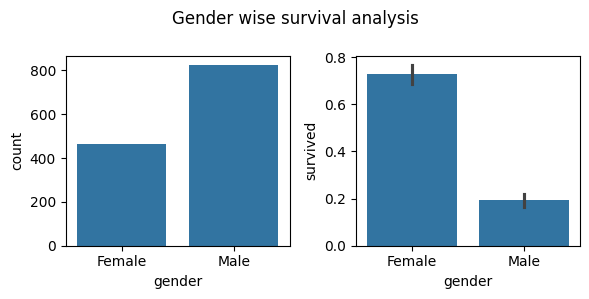

In [169]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3)) # about figure details and box position
print(fig, axes)
sns.countplot(df, x="gender", ax=axes[0])
sns.barplot(df, x="gender", y="survived", estimator="mean", ax=axes[1])
plt.suptitle("Gender wise survival analysis")
plt.tight_layout()
plt.show()

**Observation**:
1. Male passengers are more compared to female passenges
2. Female passengers have high chance of survival than male passengers

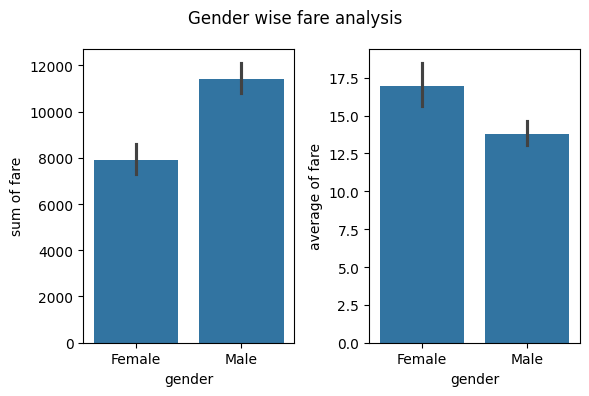

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
sns.barplot(df, x="gender", y="fare", estimator="sum", ax=axes[0])
sns.barplot(df, x="gender", y="fare", estimator="mean", ax=axes[1])
axes[0].set_ylabel('sum of fare')
axes[1].set_ylabel('average of fare')
plt.suptitle("Gender wise fare analysis")
plt.tight_layout()

**Observation**:
1. Male passengers total fare is higher compared to female. but avg fare is higher in female passengers than male.
2. This shows that every one are not paying same amount

<Axes: xlabel='gender', ylabel='fare'>

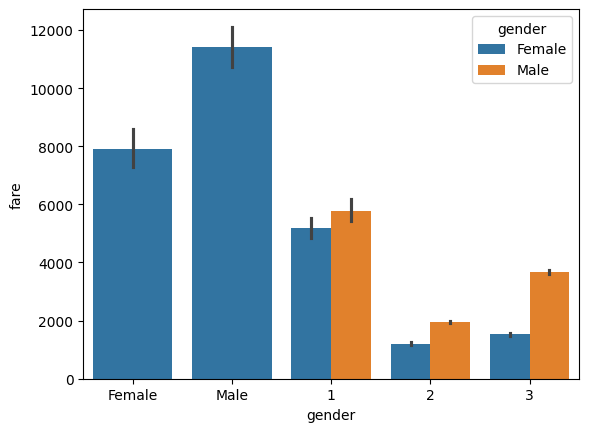

In [171]:
sns.barplot(df, x="gender", y="fare", estimator="sum")
sns.barplot(df, x="pclass", hue="gender", y="fare", estimator="sum")

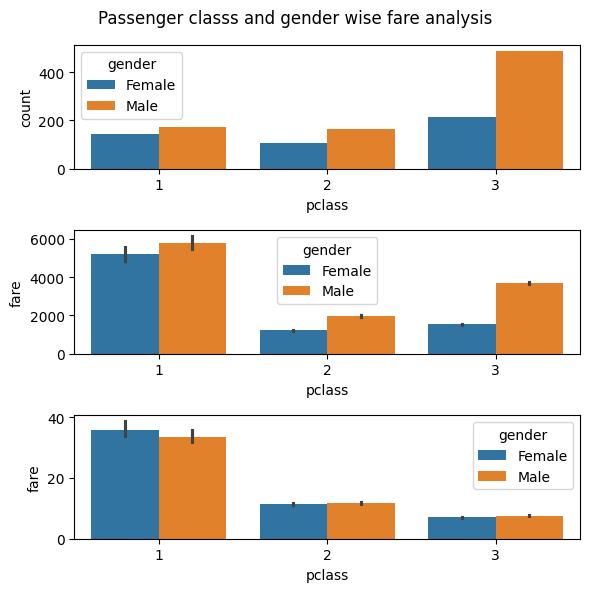

In [175]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.countplot(df, x="pclass", hue="gender", ax=axes[0])
sns.barplot(df, x="pclass", y="fare", hue="gender", estimator="sum", ax=axes[1])
sns.barplot(df, x="pclass", y="fare", hue="gender", estimator="mean", ax=axes[2])
# axes[0].set_ylabel('sum of fare')
# axes[1].set_ylabel('average of fare')
plt.suptitle("Passenger classs and gender wise fare analysis")
plt.tight_layout()

**observaion**
1. Male passengers are more in number compared than female hence total amount is higher than male category
2. female average in each pclass is higher or almost equal to male passengers.

**why femalre avg fare i greater than male avg fare ?**

because the female population is less compared to male

PG work (gender, pclass, fare, embark) use barplot